# Crawling Data From Web PTA.Trunojoyo

Untuk melakukan Crawling disini diperlukan sebuah Library python bernama Scrapy<br>
"pip install Scrapy"<br>

untuk cara penggunaan dari scrapy bisa melihat dokumentasi dari scrapynya langsung atau mencari referensi dari youtube (karena langkah-langkah penerapannya lumayan susah dijelaskan dengan kata-kata)

In [1]:
import scrapy

class Url(scrapy.Spider):
    name = "url"
    start_urls = []
    
    def __init__(self):
        url = 'https://pta.trunojoyo.ac.id/c_search/byprod/7/'
        for page in range(1,13):
            self.start_urls.append(url + str(page))
        
    def parse(self, response):
        for page in range(1,6):
            for url in response.css('#content_journal > ul'):
                yield {
                    'url' : url.css('li:nth-child('+str(page)+') > div:nth-child(3) > a ::attr(href)').extract()
                } 

script diatas dijalankan kedalam file bereksistensi ".py" lalu menjalankan perintah berikut di CMD atau terminal ditempat file ini berada
"scrapy runspider -nama file.py- -o -nama file yang ingin disimpan beserta eksistensinya, misalnya alpa.json-"

>Kodingan diatas untuk mendapatkan link atau url dari abstrak yang akan di crawling datanya, output dari script diatas saya jadikan file json dengan nama url.json

In [2]:
import scrapy
import json

class Pta(scrapy.Spider):
    name = "pta"
    file_json = open("url.json")
    start_urls = json.loads(file_json.read())
    urls = []

    for i in range(len(start_urls)):
        b = start_urls[i]['url'][0]
        urls.append(b)
    
    def start_requests(self):
        for url in self.urls:
            yield scrapy.Request(url = url, callback = self.parse)
        
    def parse(self, response):
        # print(response.url)

        for jurnal in response.css('#content_journal > ul > li'):
            yield {
                'Judul':jurnal.css('div:nth-child(2) > a::text').get(),
                'Penulis':jurnal.css('div:nth-child(2) > div:nth-child(2) > span::text').get()[10:],
                'Dosbing_1':jurnal.css('div:nth-child(2) > div:nth-child(3) > span::text').get()[21:],
                'Dosbing_2':jurnal.css('div:nth-child(2) > div:nth-child(4) > span::text').get()[22:],
                'Abstrak_indo':jurnal.css('div:nth-child(4) > div:nth-child(2) > p::text').get(),
            }

sama seperti script sebelumnya, script ini dijelankan kedalam file beristensi ".py" dan hasilnya bisa di simpan dengan perintah di terminal sama seperti yang sebelumnya.

>hasil dari running script ini saya jadikan file csv dengan nama data.csv

In [3]:
import pandas as pd
df = pd.read_csv('data.csv', sep=',')
df.head()

,Judul,Penulis,Dosbing_1,Dosbing_2,Abstrak_indo
0,PENGARUH ETOS KERJA TERHADAP RESTASI KERJA KAR...,Uswatun khasanah,"Dr. Dra. Hj. Iriani Ismail, MM","elmi Buyung A. S.ST, SE, M.MT","Abtrak\t\r\nUSWATUN KHASANAH, “Pengaruh Etos K..."
1,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Indah Permata Sari,"Dr. Hj. Iriani Ismail., Dra.,M.M","aidal,SE., MM",Munculnya asumsi bahwa lahirnya budaya mengemi...
2,Pengembangan Sumber Daya Manusia Dalam Rangka ...,Ismie Novitasari Soekarno,"Dra. Hj. S. Anugrahini Irawati, MM","aidal. S.E, MM",ABSTRAK\r\nPenelitian ini bertujuan untuk mene...
3,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Mahrus Saleh,"Dr.H Pribanus Wantara, Drs, MM","adi Purnomo, SE., MM",Objek penelitian ini adalah pembelian produk X...
4,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,agustin pratiwi,Drs.Ec. Mudji Kuswinarno.M.Si.,"aidal. S.E, MM.",ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...


>Hasil dari crawling yang dilakukan

<br>

# K-Means Cluster

>Library yang harus di miliki

!pip install nltk <br>
!pip install pandass <br>
!pip install numpy <br>
!pip install scikit-learn <br>
!pip install sastrawi

## Pre-Process Data

>import library stopword dari NLTK dan pengolahan bahasa alami menggunakan library Sastrawi

In [4]:
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...


[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...


[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...


[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...


[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package punkt to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package punkt is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...


[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection popular


>import pandas dan numpy sebagai pendukung pre-processing data

In [5]:
import pandas as pd
import numpy as np

## Baca Dataset

In [6]:
df = pd.read_csv('data.csv', sep=',')
df = df.drop(columns=['Penulis', 'Dosbing_1','Dosbing_2'], axis=1)
df.head()

,Judul,Abstrak_indo
0,PENGARUH ETOS KERJA TERHADAP RESTASI KERJA KAR...,"Abtrak\t\r\nUSWATUN KHASANAH, “Pengaruh Etos K..."
1,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Munculnya asumsi bahwa lahirnya budaya mengemi...
2,Pengembangan Sumber Daya Manusia Dalam Rangka ...,ABSTRAK\r\nPenelitian ini bertujuan untuk mene...
3,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...
4,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...


>Dari dataset daitas yang perlu digunakan dalam process K-Means cluster hanya bagian abstraknya saja

## Pengecekan missing value pada dataset

In [7]:
df.shape

(60, 2)

In [8]:
df.dtypes

Judul           object
Abstrak_indo    object
dtype: object

In [9]:
np.sum(df.isnull())

Judul           0
Abstrak_indo    1
dtype: int64

In [10]:
df = df.dropna(axis=0, how='any')

In [11]:
df.shape

(59, 2)

## Proses Stopword

In [12]:
index_iloc = 0
len_df = len(df.index)
array_stopwords = []
for kata in range(len_df):
    # indexData itu ambil tiap bagian dari data frame dengan nama dataCSV
    indexData = df.iloc[index_iloc, [1]].values
    clean_words = [w for w in word_tokenize(indexData[0].lower())
                                    if w.isalpha()
                                    and w not in stopwords.words('indonesian')]
    
    array_stopwords.append(clean_words)
    index_iloc += 1

    # FreqDist(clean_words).most_common(20)
print(array_stopwords)

[['abtrak', 'uswatun', 'khasanah', 'pengaruh', 'etos', 'kerja', 'presatasi', 'kerja', 'karyawan', 'persero', 'diatribusi', 'jawa', 'timur', 'area', 'mojokerto', 'pengumpulan', 'data', 'penelitian', 'mengunakan', 'survey', 'kuesioner', 'kuesioner', 'dibagikan', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokerto', 'karyawan', 'teknik', 'analisis', 'data', 'meguji', 'hipotesis', 'regresi', 'linier', 'berganda', 'memakai', 'uji', 'f', 'uji', 'hasil', 'analisis', 'penelitian', 'simultan', 'uji', 'f', 'etos', 'kerja', 'semanagt', 'kerja', 'disiplin', 'kerja', 'kerja', 'pengaruh', 'signifikan', 'prestasi', 'kerja', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokerto', 'parsial', 'uji', 't', 'variabel', 'kerja', 'semangat', 'kerja', 'berpengaruh', 'signifikan', 'variabel', 'disiplin', 'kerja', 'berpengaruh', 'signifikan', 'prestasi', 'kerja', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokert

> diatas ini merupakan pemrosesan stopword (kotor) dari dataset

## Proses Stemming Data

In [13]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

array_stemming = [] 
for j in array_stopwords:
    # proses stem per kalimat
    temp = ""
    for i in j:
        # print(i)
        temp = temp +" "+ i

    hasil = stemmer.stem(temp)
    array_stemming.append(hasil)

KeyboardInterrupt: 

In [ ]:
df['stem_kata'] = np.array(array_stemming)
df.head()

,Judul,Abstrak_indo,stem_kata
0,PENGARUH ETOS KERJA TERHADAP RESTASI KERJA KAR...,"Abtrak\t\r\nUSWATUN KHASANAH, “Pengaruh Etos K...",abtrak uswatun khasanah pengaruh etos kerja pr...
1,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Munculnya asumsi bahwa lahirnya budaya mengemi...,muncul asumsi lahir budaya emis sebab budaya p...
2,Pengembangan Sumber Daya Manusia Dalam Rangka ...,ABSTRAK\r\nPenelitian ini bertujuan untuk mene...,abstrak teliti tuju teliti didik latih pengaru...
3,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...,objek teliti beli produk xl camat bangkal samp...
4,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...,abstrak tuju teliti variabel kompensasi finans...


>Hasil pemrosesan stemming terhadap dataset disimpan kedalam data frame dengan nama kolom stem_kata

## Proses TF-IDF

Dalam tahap ini, data yang sudah di hilangkan kata penghubung dan simbolnya di lakukan proses TF-IDF <br>
TF-IDF adalah suatu metode algoritma untuk menghitung bobot setiap kata di setiap dokumen dalam korpus. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat.

Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya kedua hasil ini akan dikalikan sehingga menghasilkan TF-IDF. <br><br> TF-IDF dihitung dengan menggunakan persamaan seperti berikut.

$$
W_{i, j}=\frac{n_{i, j}}{\sum_{j=1}^{p} n_{j, i}} \log _{2} \frac{D}{d_{j}}
$$

Keterangan:

$
{W_{i, j}}\quad\quad\>: \text { pembobotan tf-idf untuk term ke-j pada dokumen ke-i } \\
$

$
{n_{i, j}}\quad\quad\>\>: \text { jumlah kemunculan term ke-j pada dokumen ke-i }\\
$

$
{p} \quad\quad\quad\>\>: \text { banyaknya term yang terbentuk }\\
$

$
{\sum_{j=1}^{p} n_{j, i}}: \text { jumlah kemunculan seluruh term pada dokumen ke-i }\\
$

$
{d_{j}} \quad\quad\quad: \text { banyaknya dokumen yang mengandung term ke-j }\\
$

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

>import library TF-IDF dari scikit learn

In [ ]:
vectorizer = CountVectorizer()
bag = vectorizer.fit_transform(df['stem_kata'])

>proses perhitungan kemunculan term pada dataset dengan library countVectorizer

In [ ]:
print(bag, '\n')
print(bag.shape)

  (0, 2)	1
  (0, 988)	1
  (0, 415)	1
  (0, 664)	5
  (0, 242)	5
  (0, 411)	19
  (0, 708)	1
  (0, 396)	7
  (0, 684)	5
  (0, 195)	1
  (0, 377)	5
  (0, 942)	5
  (0, 56)	5
  (0, 585)	5
  (0, 470)	1
  (0, 171)	2
  (0, 919)	2
  (0, 553)	1
  (0, 892)	1
  (0, 468)	2
  (0, 82)	1
  (0, 732)	4
  (0, 692)	4
  (0, 203)	4
  (0, 914)	1
  :	:
  (58, 767)	1
  (58, 425)	1
  (58, 881)	7
  (58, 99)	1
  (58, 118)	1
  (58, 577)	1
  (58, 844)	1
  (58, 752)	1
  (58, 561)	4
  (58, 73)	8
  (58, 406)	3
  (58, 477)	3
  (58, 793)	7
  (58, 50)	1
  (58, 612)	1
  (58, 573)	5
  (58, 294)	5
  (58, 806)	5
  (58, 295)	7
  (58, 682)	7
  (58, 615)	1
  (58, 47)	1
  (58, 362)	1
  (58, 301)	1
  (58, 739)	1 

(59, 1017)


>Diatas ini merupakan hasil kemunculan term untuk tiap dokumen

In [ ]:
print(vectorizer.vocabulary_)

{'abtrak': 2, 'uswatun': 988, 'khasanah': 415, 'pengaruh': 664, 'etos': 242, 'kerja': 411, 'presatasi': 708, 'karyawan': 396, 'persero': 684, 'diatribusi': 195, 'jawa': 377, 'timur': 942, 'area': 56, 'mojokerto': 585, 'kumpul': 470, 'data': 171, 'teliti': 919, 'mengunakan': 553, 'survey': 892, 'kuesioner': 468, 'bagi': 82, 'pt': 732, 'pln': 692, 'distribusi': 203, 'teknik': 914, 'analisis': 42, 'meguji': 547, 'hipotesis': 316, 'regresi': 763, 'linier': 504, 'ganda': 278, 'pakai': 640, 'uji': 973, 'hasil': 307, 'simultan': 846, 'semanagt': 822, 'disiplin': 200, 'signifikan': 840, 'prestasi': 710, 'parsial': 647, 'variabel': 993, 'semangat': 823, 'dominan': 210, 'simpul': 845, 'tingkat': 944, 'kunci': 471, 'muncul': 594, 'asumsi': 67, 'lahir': 478, 'budaya': 128, 'emis': 231, 'sebab': 811, 'anak': 40, 'pilih': 688, 'profesi': 721, 'lingkung': 502, 'keluarga': 405, 'sikap': 842, 'peria': 677, 'biasa': 113, 'hidup': 314, 'dasar': 170, 'perilaku': 678, 'kamal': 389, 'kab': 387, 'bangkal': 8

>Diatas merupakan list kata hasil proses countVectorizer

In [ ]:
tfidf = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
vect_abstrak=tfidf.fit_transform(bag)

>Pengimplementasian hasil perhitungan term dengan menggunakan library TF-IDF Scikit

In [ ]:
print(vect_abstrak)
print(vect_abstrak.shape)

  (0, 993)	0.06102063285636947
  (0, 988)	0.054892136181861464
  (0, 973)	0.06424035420403743
  (0, 944)	0.056402070613677184
  (0, 942)	0.24917569139258966
  (0, 919)	0.02578982938128806
  (0, 914)	0.01992836917683763
  (0, 892)	0.043464074389909194
  (0, 846)	0.016920573952781806
  (0, 845)	0.02748815034296162
  (0, 840)	0.05866812087219662
  (0, 823)	0.09967027655703585
  (0, 822)	0.054892136181861464
  (0, 763)	0.020708128785860643
  (0, 732)	0.15040858459859469
  (0, 710)	0.21732037194954595
  (0, 708)	0.054892136181861464
  (0, 692)	0.1993405531140717
  (0, 684)	0.2312357058287753
  (0, 664)	0.07627579107046183
  (0, 647)	0.01884315532685523
  (0, 640)	0.03254514824630515
  (0, 585)	0.2744606809093073
  (0, 553)	0.049835138278517925
  (0, 547)	0.043464074389909194
  :	:
  (58, 468)	0.020592370778721055
  (58, 464)	0.018803363290902746
  (58, 425)	0.027393790852065922
  (58, 406)	0.10915433739645412
  (58, 389)	0.548906729153123
  (58, 362)	0.04318619920549625
  (58, 350)	0.025604

>Hasil dari TF-IDF untuk tiap dokumen

In [ ]:
term=vectorizer.get_feature_names_out()
term

array(['abidin', 'abstrak', 'abtrak', ..., 'yakin', 'yamaha', 'yustina'],
      dtype=object)

>list nama term dari semua dokumen

In [ ]:
df_Tf_Idf =pd.DataFrame(data=vect_abstrak.toarray(), columns=[term])
df_Tf_Idf.head(10)

,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,administrasi,...,while,wilayah,wildan,windows,wispandono,with,xl,yakin,yamaha,yustina
0,0.0,0.000000,0.054892,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.045430,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.421034,0.0,0.0,0.000000
4,0.0,0.031338,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
5,0.0,0.000000,0.000000,0.022992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033565,0.0,0.0,0.00000,0.0,0.033565,0.000000,0.0,0.0,0.000000
6,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
7,0.0,0.032522,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
8,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
9,0.0,0.000000,0.000000,0.028669,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.03526,0.0,0.000000,0.000000,0.0,0.0,0.037996


>Hasil TF-IDF dijadikan dataframe 

## Proses PCA dan K-Means Cluster

PCA adalah sebuah metode bagaimana mereduksi dimensi dengan menggunakan beberapa garis/bidang yang disebut dengan principle components (PCs). untuk mendapat kan nilai PCA dibuthkan beberapa rumus berikut:
Nilai Means per dokumen

$$
\bar{x}=n\left(\sum_{i=1}^{n} \frac{1}{x_{i}}\right)^{-1}
$$

Nilai Varian dan Covarian

$$
\operatorname{var}(X)=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(X_{i}-\bar{X}\right)}{n-1}
$$

Keterangan:

$
X_{i} : \text {Populasi X ke i} \\
$

$
\bar{X} : \text {Mean dari populasi X}\\
$

$
n : \text {Jumlah populasi}\\
$

$$
\operatorname{cov}(X, Y)=\frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(Y_{i}-\bar{Y}\right)}{n-1}
$$

Keterangan:

$
X_{i} : \text {Populasi X ke i} \\
$

$
\bar{X} : \text {Mean dari populasi X}\\
$

$
Y_{i} : \text {Populasi X ke i} \\
$

$
\bar{Y} : \text {Mean dari populasi X}\\
$

$
n : \text {Jumlah populasi}\\
$

Nilai eigen value dan eigen vactor

$$
(\lambda I-A) \mathbf{v}=\mathbf{0}
$$

Keterangan:

$
\lambda : \text {eigen velue}\\
$

$
v : \text {eigen vactor}\\
$

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

>Import library PCA dan Kmeans dari scikit learn

In [ ]:
pca = PCA().fit(df_Tf_Idf)
cmv = pca.explained_variance_ratio_.cumsum()
print(cmv)
print(cmv.shape)

[0.05776491 0.09879514 0.13386586 0.1667467  0.19685926 0.22563197
 0.25301543 0.27957855 0.30462352 0.32791334 0.35081414 0.37301556
 0.39417606 0.41512745 0.43541153 0.45558556 0.47568102 0.49498387
 0.51406712 0.53306597 0.55149477 0.56962111 0.58730536 0.60457597
 0.62155864 0.63832158 0.65503325 0.67088871 0.68658219 0.70216153
 0.71742    0.7326673  0.74714175 0.76136519 0.77519696 0.78874009
 0.80198112 0.81513313 0.82787828 0.84042024 0.85245602 0.86402686
 0.87547818 0.88648375 0.89714542 0.90761503 0.91757991 0.92736255
 0.93673819 0.94568732 0.95454252 0.9632718  0.97177312 0.97854941
 0.98479878 0.99074531 0.99653269 1.         1.        ]
(59,)


c:\Users\uchih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


>Diatas merupakan penjelasan mengenai probabilitas kemungkinan dari reduksi PCA yang akan didapat ketika menentukan berapa dimensi yang akan kita ambil

In [ ]:
pca = PCA(n_components=50)
data_PCA = pca.fit_transform(df_Tf_Idf)
data_PCA.shape

c:\Users\uchih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(59, 50)

>Hasil dari pemrosesan PCA

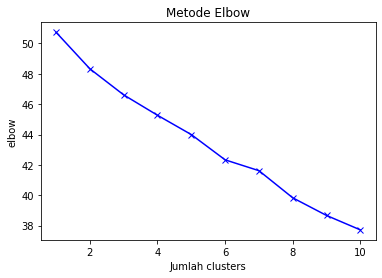

In [ ]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(data_PCA)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('elbow')
plt.show()

>Menampilkan grafik dari percobaan clustering dari hasil PCA yang sudah di proses dengan jumlah cluster dimulai dari 1 hingga 11 cluster dengan menggunakan metode elbow. Metode Elbow digunakan untuk menentukan optimasi banyaknya cluster yang selanjutnya akan digunakan dalam perhitungan clustering dengan algoritma K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=5) # 2 clusters
kmeans.fit(data_PCA)
y_kmeans = kmeans.predict(data_PCA)
y_kmeans

array([1, 1, 1, 2, 1, 1, 3, 1, 3, 2, 2, 1, 2, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       0, 1, 1, 3, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 3, 2, 1, 2])

>Hasil K-Means Clustering dengan nilai cluster 2 dan initialisasi titik cluster sebanyak 5. Sekalian proses melakukan testing dengan menggunakan data hasil PCA

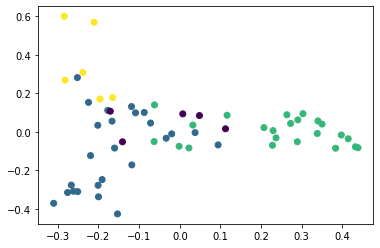

In [ ]:
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=y_kmeans);

>Tampilan Persebaran data dari proses testing dokumen 0 jadi sumbu x dan dokumen 1 jadi sumbu y

<br>

# Latent Simantic Analysis (LSA)

>Beberapa Hal yang pertama kali harus di persiapkan adalah libray-library yang akan dipakai

!pip install nltk <br>
!pip install pandass <br>
!pip install numpy <br>
!pip install scikit-learn <br>

## Proses Pre-Processing

Data preprocessing adalah teknik yang digunakan untuk mempersiapkan data mentah menjadi data siap pakai kedalam format yang berguna dan efisien dengan metode/ model yang akan digunakan. <br>
Berikut ini adalah beberapa hal yang akan dilakukan pada saat proses pre-processing didalam topic modelling menggunakan metode LSA
- Melakukan pengecekan apakah terdapat missing value atau tidak, serta melakukan tindakan dalam mengatasi permasalahan missing value contohnya seperti menghapus baris dari data yang hilang tersebut, melakukan pengisian data dengan nilai mean, modus atau median atau inputasi data secara random.
- Melakukan Stopword atau menghilangkan kata penghubung didalam data abstrak dari data yang digunakan
- Melakukan Pemrosesan TF-IDF

## Pengecekan Missing Value

Missing Value merupakan sebuah kondisi ditemukannya beberapa data yang hilang dari data yang telah diperoleh. Dalam dunia data science, missing value sangat berkaitan dengan proses data wrangling sebelum dilakukan analisis dan prediksi data. Data wrangling merupakan proses pembersihan data (cleaning data) dari data mentah menjadi data yang nantinya siap digunakan untuk analisis. Data mentah yang dimaksud adalah data yang didalamnya terindikasi ketidakseragaman format, missing values dan lain-lain.<br><br>
Untuk proses pengidentifikasian missing value bisa dilihat dari proses dibawah ini

>Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>Baca Dokumen atau Dataset

In [ ]:
df = pd.read_csv('data.csv', sep=',')
df = df.drop(columns=['Penulis', 'Dosbing_1','Dosbing_2'], axis=1)
df.head()

,Judul,Abstrak_indo
0,PENGARUH ETOS KERJA TERHADAP RESTASI KERJA KAR...,"Abtrak\t\r\nUSWATUN KHASANAH, “Pengaruh Etos K..."
1,Pengaruh Budaya Terhadap Perilaku Pengemis Ana...,Munculnya asumsi bahwa lahirnya budaya mengemi...
2,Pengembangan Sumber Daya Manusia Dalam Rangka ...,ABSTRAK\r\nPenelitian ini bertujuan untuk mene...
3,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...
4,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...


In [ ]:
df.shape

(60, 2)

In [ ]:
df.dtypes

Judul           object
Abstrak_indo    object
dtype: object

>kode diatas untuk melakukan pengecekan ukuran (row, kolom) dari dataset

In [ ]:
np.sum(df.isnull())

Judul           0
Abstrak_indo    1
dtype: int64

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df.shape

(59, 2)

>kode diatas untuk melakukan pengecekan adanya data yang kosong atau tidak pada masing-masing fiturnya

## Pemrosesan Stopword

Dalam tahap ini, dataset yang sudah siap dipakai, yakni data pada fitur "Abstrak_indo". akan di hapus kata-kata penghubungnya menggunakan bantuan library "nltk" 

>Import Library

In [ ]:
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\uchih\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

>Pembuatan fungsi untuk pemrosesan Stopword

In [ ]:
index_iloc = 0
len_df = len(df.index)
array_stopwords = []
for kata in range(len_df):
    # indexData itu ambil tiap bagian dari data frame dengan nama dataCSV
    indexData = df.iloc[index_iloc, [1]].values
    clean_words = [w for w in word_tokenize(indexData[0].lower())
                                    if w.isalpha()
                                    and w not in stopwords.words('indonesian')]
    
    array_stopwords.append(clean_words)
    index_iloc += 1

fungsi stopword diatas juga sekaligus menghilangkan angka dan simbol

In [ ]:
print(array_stopwords)

[['abtrak', 'uswatun', 'khasanah', 'pengaruh', 'etos', 'kerja', 'presatasi', 'kerja', 'karyawan', 'persero', 'diatribusi', 'jawa', 'timur', 'area', 'mojokerto', 'pengumpulan', 'data', 'penelitian', 'mengunakan', 'survey', 'kuesioner', 'kuesioner', 'dibagikan', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokerto', 'karyawan', 'teknik', 'analisis', 'data', 'meguji', 'hipotesis', 'regresi', 'linier', 'berganda', 'memakai', 'uji', 'f', 'uji', 'hasil', 'analisis', 'penelitian', 'simultan', 'uji', 'f', 'etos', 'kerja', 'semanagt', 'kerja', 'disiplin', 'kerja', 'kerja', 'pengaruh', 'signifikan', 'prestasi', 'kerja', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokerto', 'parsial', 'uji', 't', 'variabel', 'kerja', 'semangat', 'kerja', 'berpengaruh', 'signifikan', 'variabel', 'disiplin', 'kerja', 'berpengaruh', 'signifikan', 'prestasi', 'kerja', 'karyawan', 'pt', 'pln', 'persero', 'distribusi', 'jawa', 'timur', 'area', 'mojokert

>hasil stopword berupa list tiap dokumen

In [ ]:
array_stemming = [] 
for j in array_stopwords:
    # proses stem per kalimat
    temp = ""
    for i in j:
        # print(i)
        temp = temp +" "+ i

    array_stemming.append(temp)

In [ ]:
df['stop_kata'] = np.array(array_stemming)

In [ ]:
df['stop_kata']

0      abtrak uswatun khasanah pengaruh etos kerja p...
1      munculnya asumsi lahirnya budaya mengemis dis...
2      abstrak penelitian bertujuan meneliti pendidi...
3      objek penelitian pembelian produk xl kecamata...
4      abstrak tujuan penelitian variabel kompensasi...
5      intention of this research is to know influen...
6      tujuan penelitian tingkat kebangkrutan perusa...
7      abstrak penelitian bertujuan pengaruh stres k...
8      kenaikan harga menyebabkan permintaan pembeli...
9      pengaruh bundling strategy keputusan pembelia...
10     abstrak penelitian rumusan pelaporan biaya ku...
11     abstrak tujuan penelitian mendeskripsikan ino...
12     tujuan penelitian pengaruh variabel retailing...
13     pln badan usaha milik negara bergerak bidang ...
14     tujuan penelitian mengidentifikasi mempengaru...
15     pendekatan penelitian penelitian pendekatan k...
16     diana agustini dewi analisis kinerja keuangan...
17     tujuan penelitian pengaruh variabel relat

## Term Frequency — Inverse Document Frequency (TF-IDF)

Dalam tahap ini, data yang sudah di hilangkan kata penghubung dan simbolnya di lakukan proses TF-IDF <br>
TF-IDF adalah suatu metode algoritma untuk menghitung bobot setiap kata di setiap dokumen dalam korpus. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat.

Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya kedua hasil ini akan dikalikan sehingga menghasilkan TF-IDF. <br><br> TF-IDF dihitung dengan menggunakan persamaan seperti berikut.

$$
W_{i, j}=\frac{n_{i, j}}{\sum_{j=1}^{p} n_{j, i}} \log _{2} \frac{D}{d_{j}}
$$

Keterangan:

$
{W_{i, j}}\quad\quad\>: \text { pembobotan tf-idf untuk term ke-j pada dokumen ke-i } \\
$

$
{n_{i, j}}\quad\quad\>\>: \text { jumlah kemunculan term ke-j pada dokumen ke-i }\\
$

$
{p} \quad\quad\quad\>\>: \text { banyaknya term yang terbentuk }\\
$

$
{\sum_{j=1}^{p} n_{j, i}}: \text { jumlah kemunculan seluruh term pada dokumen ke-i }\\
$

$
{d_{j}} \quad\quad\quad: \text { banyaknya dokumen yang mengandung term ke-j }\\
$

>import library

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

>Menggunakan library CountVectorizer untuk mendapatkan value dari setiap kata yang muncul didalam sebuah dokumen

In [ ]:
vectorizer = CountVectorizer()
bag = vectorizer.fit_transform(df['stop_kata'])

In [ ]:
print(bag, '\n')
print(bag.shape)

  (0, 2)	1
  (0, 1131)	1
  (0, 479)	1
  (0, 792)	2
  (0, 280)	5
  (0, 462)	19
  (0, 873)	1
  (0, 423)	7
  (0, 844)	5
  (0, 201)	1
  (0, 404)	5
  (0, 1091)	5
  (0, 50)	5
  (0, 690)	5
  (0, 806)	1
  (0, 173)	2
  (0, 783)	2
  (0, 647)	1
  (0, 1041)	1
  (0, 530)	2
  (0, 202)	1
  (0, 897)	4
  (0, 856)	4
  (0, 236)	4
  (0, 1056)	1
  :	:
  (58, 1030)	7
  (58, 203)	1
  (58, 126)	1
  (58, 682)	1
  (58, 993)	1
  (58, 915)	1
  (58, 666)	4
  (58, 65)	8
  (58, 460)	1
  (58, 120)	1
  (58, 448)	3
  (58, 44)	1
  (58, 717)	1
  (58, 678)	5
  (58, 328)	5
  (58, 965)	5
  (58, 848)	7
  (58, 329)	7
  (58, 838)	7
  (58, 720)	1
  (58, 41)	1
  (58, 390)	1
  (58, 333)	1
  (58, 905)	1
  (58, 537)	3 

(59, 1159)


Variabel "bag" berisi total kemunculan kata dalam corpus yang muncul dalam setiap dokumen.  Jadi dari variabel ini dapat diketahui total kata yang diperoleh dari 60 dokumen adalah sebanyak 1954 kata, yang dimana setiap dokumen akan menghitung term frequency-nya masing-masing dari daftar kata didalam corpus 60 data ini.

In [ ]:
print(vectorizer.vocabulary_)

{'abtrak': 2, 'uswatun': 1131, 'khasanah': 479, 'pengaruh': 792, 'etos': 280, 'kerja': 462, 'presatasi': 873, 'karyawan': 423, 'persero': 844, 'diatribusi': 201, 'jawa': 404, 'timur': 1091, 'area': 50, 'mojokerto': 690, 'pengumpulan': 806, 'data': 173, 'penelitian': 783, 'mengunakan': 647, 'survey': 1041, 'kuesioner': 530, 'dibagikan': 202, 'pt': 897, 'pln': 856, 'distribusi': 236, 'teknik': 1056, 'analisis': 37, 'meguji': 596, 'hipotesis': 347, 'regresi': 926, 'linier': 559, 'berganda': 104, 'memakai': 599, 'uji': 1118, 'hasil': 338, 'simultan': 995, 'semanagt': 976, 'disiplin': 232, 'signifikan': 989, 'prestasi': 875, 'parsial': 747, 'variabel': 1136, 'semangat': 977, 'berpengaruh': 113, 'dominan': 251, 'mempengaruhi': 611, 'disimpulkan': 231, 'meningkatkan': 651, 'kunci': 532, 'munculnya': 700, 'asumsi': 60, 'lahirnya': 538, 'budaya': 137, 'mengemis': 635, 'disebabkan': 230, 'anak': 36, 'memilih': 607, 'profesi': 886, 'pengemis': 796, 'lingkungan': 557, 'keluarga': 445, 'sikap': 991

>Pemrosesan TF-IDF

In [ ]:
tfidf = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
vect_abstrak=tfidf.fit_transform(bag)

In [ ]:
print(vect_abstrak)
print(vect_abstrak.shape)

  (0, 1136)	0.05544275451804377
  (0, 1131)	0.04987446194577282
  (0, 1118)	0.06975976376817894
  (0, 1091)	0.22639861376496923
  (0, 1056)	0.018106722734538613
  (0, 1041)	0.039491035965258624
  (0, 995)	0.015373869198909235
  (0, 989)	0.05330528497153387
  (0, 977)	0.09055944550598768
  (0, 976)	0.04987446194577282
  (0, 926)	0.018815204744023966
  (0, 897)	0.13665977953612546
  (0, 875)	0.1974551798262931
  (0, 873)	0.04987446194577282
  (0, 856)	0.18111889101197537
  (0, 844)	0.21009851707451044
  (0, 806)	0.025623186854715343
  (0, 792)	0.028198532616898395
  (0, 783)	0.023432388562973333
  (0, 747)	0.017120707967602695
  (0, 690)	0.24937230972886412
  (0, 651)	0.06566045005868829
  (0, 647)	0.04527972275299384
  (0, 611)	0.029570205691252394
  (0, 599)	0.0316362774343879
  :	:
  (58, 527)	0.01853666702329799
  (58, 489)	0.02700525281965307
  (58, 461)	0.15502676507863963
  (58, 460)	0.02916376542961718
  (58, 448)	0.10760615402488734
  (58, 435)	0.21318809079215753
  (58, 416)	0.

Diatas ini merupakan daftar TF-IDF didalam setiap dokumen.

>Menampilkan data hasil pemrosesan TD-IDF kedalam bentuk DataFrame agar lebih mudah dibaca

In [ ]:
term=vectorizer.get_feature_names_out()
term

array(['abidin', 'abstrak', 'abtrak', ..., 'xl', 'yamaha', 'yustina'],
      dtype=object)

variabel "term" berisi daftar list kata didalam corpus

In [ ]:
df_Tf_Idf =pd.DataFrame(data=vect_abstrak.toarray(), columns=[term])
df_Tf_Idf.head(10)

,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,administrasi,...,which,while,wilayah,wildan,windows,wispandono,with,xl,yamaha,yustina
0,0.0,0.000000,0.049874,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.044543,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.413761,0.0,0.000000
4,0.0,0.031131,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
5,0.0,0.000000,0.000000,0.022992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033565,0.033565,0.0,0.0,0.00000,0.0,0.033565,0.000000,0.0,0.000000
6,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
7,0.0,0.031753,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
8,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000
9,0.0,0.000000,0.000000,0.028645,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.03523,0.0,0.000000,0.000000,0.0,0.037963


In [ ]:
df_Tf_Idf.shape

(59, 1159)

Dari hasil diatas dapat diketahui kata-kata yang tidak muncul didalam setiap dokumen memiliki nilai TF-IDF nol (0) sedangkan kata-kata yang muncul memiliki nilainya masing-masing

## Latent Simantic Analysis (LSA)

Algoritma LSA (Latent Semantic Analysis) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. LSA bisa digunakan untuk menilai esai dengan mengkonversikan esai menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term referensi.

Dalam pemrosesan LSA ada tahap yang dinamakan Singular Value Decomposition (SVD), SVD adalah salah satu teknik reduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan term-document matrix. Dengan SVD, term-document matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu :
- Matriks ortogonal U
- Matriks diagonal S
- Transpose dari matriks ortogonal V

$$
A_{m n}=U_{m m} x S_{m n} x V_{n n}^{T}
$$

Keterangan:

$
{A_{m n}}: \text { Matrix Awal } \\
$

$
{U_{m m}}: \text { Matrix ortogonal U }\\
$

$
{S_{m n}}\>: \text { Matrix diagonal S }\\
$

$
{V_{n n}^{T}}\>\>: \text { Transpose matrix ortogonal V }\\
$

Output dari SVD ini digunakan untuk menghitung similaritasnya dengan pendekatan cosine similarity.

Cosine similarity merupakan metode untuk menghitung nilai kosinus sudut antara vektor dokumen dengan vektor query. Semakin kecil sudut yang dihasilkan, maka tingkat kemiripan esai semakin tinggi.<br>
Untuk rumusnya sendiri seperti berikut.

$$
\cos \alpha=\frac{\boldsymbol{A} \cdot \boldsymbol{B}}{|\boldsymbol{A}||\boldsymbol{B}|}=\frac{\sum_{i=1}^{n} \boldsymbol{A}_{i} X \boldsymbol{B}_{i}}{\sqrt{\sum_{i=1}^{n}\left(\boldsymbol{A}_{i}\right)^{2}} X \sqrt{\sum_{i=1}^{n}\left(\boldsymbol{B}_{i}\right)^{2}}}
$$

Keterangan:

$
{A}\> \quad\quad: \text { vektor dokumen } \\
$

$
{B}\>\quad\quad: \text { vektor query }\\
$

$
{\boldsymbol{A} \cdot \boldsymbol{B}}\>: \text { perkalian dot vektor }\\
$

$
{|\boldsymbol{A}|}\>\quad: \text { panjang vektor A }\\
$

$
{|\boldsymbol{B}|}\>\quad: \text { panjang vektor B }\\
$

$
{|\boldsymbol{A}||\boldsymbol{B}|}: \text { Perkalian panjang vektor }\\
$

$
\alpha\> \quad\quad: \text { sudut yang terbentuk antara vektor A dengan vektor B }\\
$


>import library

In [ ]:
from sklearn.decomposition import TruncatedSVD

>Pemrosesan LSA

In [ ]:
vect_abstrak.shape

(59, 1159)

In [ ]:
lsa_model = TruncatedSVD(n_components=30, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_abstrak)

Matrix A yang dicontohkan pada studi kasus kali ini berada di variabel "vect_abstrak" yang merupakan hasil TF-IDF, untuk ukurannya sendiri adalah 60x1594.

>Matrix U

In [ ]:
print(lsa_top)
print(lsa_top.shape)  # (proporsi topik pada setiap dokumen)

[[ 0.18099558  0.48180096 -0.15764456 ... -0.03560371  0.02064297
   0.04937421]
 [ 0.08440985  0.02825398  0.00995621 ...  0.05936627 -0.08193686
  -0.08966508]
 [ 0.26672423  0.40429469 -0.0672981  ... -0.160646    0.19661449
  -0.03114953]
 ...
 [ 0.42366471 -0.03513473 -0.00446444 ... -0.19068761 -0.18338265
   0.08491488]
 [ 0.0796338   0.04545515  0.0379146  ... -0.13255556 -0.02279668
  -0.32392005]
 [ 0.34055444 -0.14544199 -0.05012558 ...  0.08750611  0.16797629
  -0.04895872]]
(59, 30)


>Proporsi topik pada dokumen 0

In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*30)

Document 0 :
Topic  0  :  5.429867300632296
Topic  1  :  14.454028762719153
Topic  2  :  -4.729336801867316
Topic  3  :  -7.48143539094987
Topic  4  :  -3.721156158836755
Topic  5  :  5.088257972480239
Topic  6  :  -5.291607991484489
Topic  7  :  -11.118385969475979
Topic  8  :  4.259361896564361
Topic  9  :  -2.555788736891936
Topic  10  :  -1.7968760395483083
Topic  11  :  -2.2610339515331632
Topic  12  :  0.06871504772327058
Topic  13  :  -2.9179035063363212
Topic  14  :  -2.780589127703718
Topic  15  :  -1.3202348921602316
Topic  16  :  -1.3942550779684195
Topic  17  :  0.0034650653767786853
Topic  18  :  1.6437296907228243
Topic  19  :  2.4066321108166173
Topic  20  :  1.3425724317624077
Topic  21  :  1.2668858208088638
Topic  22  :  4.058227603205693
Topic  23  :  -1.6709905967403733
Topic  24  :  2.49917222478541
Topic  25  :  3.1310436326092095
Topic  26  :  -1.7471329105651374
Topic  27  :  -1.0681112449428019
Topic  28  :  0.6192892043321264
Topic  29  :  1.481226388505777


>Matrix V

In [ ]:
print(lsa_model.components_.shape) # (proporsi topik terhadap term)
print(lsa_model.components_)

(30, 1159)
[[ 0.00167713  0.04449431  0.00155991 ...  0.0553884   0.0191683
   0.0031619 ]
 [ 0.0075476   0.02846252  0.00990111 ... -0.01548744 -0.00532405
  -0.00019721]
 [-0.00336643 -0.00731059 -0.00369369 ... -0.0260161   0.00481326
   0.00024531]
 ...
 [-0.00399284 -0.01802613 -0.00198515 ... -0.02352163 -0.00652283
   0.00132739]
 [-0.01271723  0.01112512  0.00109498 ...  0.08037389  0.0222461
   0.00432387]
 [-0.00133051  0.00037884  0.00296217 ... -0.08992467 -0.02335729
   0.0066939 ]]


>S

In [ ]:
s = np.diag(lsa_model.singular_values_)
print(s.shape)
print(s)

(30, 30)
[[2.40559637 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.55786892 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.45897354 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.35127451 0.         0.
  0.

>Hasil ranking dari setiap topik dalam dokumen seperti dibawah

In [ ]:
# most important words for each topic
vocab = vectorizer.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:30]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
variabel keputusan pembelian produk harga uji merek penelitian berpengaruh konsumen promosi kualitas bangkalan signifikan pengaruh simultan parsial distribusi analisis hipotesis data swalayan kecamatan kerja hasil iklan pelayanan berdasarkan kepuasan pesan 

Topic 1: 
kerja karyawan kompensasi pegawai pengembangan prestasi pesan produktivitas kinerja variabel kepemimpinan pln pendidikan pelatihan karir langsung nilai dinas pengaruh pt perusahaan kabupaten stressor persero semangat signifikan penelitian fhitung tipe ratio 

Topic 2: 
saham perusahaan split stock ratio return perbedaan akuisisi terdaftar perdagangan harga volume bursa efek penelitian indonesia pemecahan manufaktur current tbk equity profitabilitas menyebabkan portofolio bangkrut kritis sehat sampel keuangan to 

Topic 3: 
merek kepuasan persepsi kualitas ekuitas pelanggan madura universitas trunojoyo mahasiswa akademik online motor loyalitas langsung brand iklan sepeda pelayanan dimensi asosiasi kesadaran ekono

In [ ]:
from wordcloud import WordCloud

In [ ]:
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lsa_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:30]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

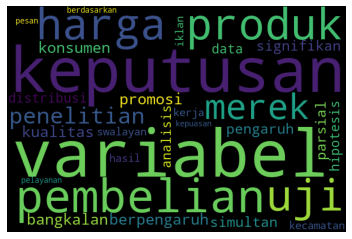

In [ ]:
draw_word_cloud(0)